## Evaluating Methodology 2 (Artificial Neural Networks) (LSTM)

### Packages

In [12]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Input
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import pandas as pd
import matplotlib.pyplot as plt

### Functions

### Get dataset

In [13]:
df_diff = pd.read_csv('../../assets/df_diff.csv')

### Preparing dataset (split, scaling and numpy array conversion)

In [14]:
# Separete features and labels
df_m2 = df_diff.copy()
df_m2.drop(columns=['mean'], inplace=True)
m2_array = df_m2.values
X = m2_array[:, :-1]
y = m2_array[:, -1]

In [15]:
# normalize features
ss = MinMaxScaler(feature_range=(0, 1))
X = ss.fit_transform(X)

In [16]:
X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.8, random_state=52)  # 80% train

X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=52)  # 10% val, 10% testc

In [17]:
# convert X_train to LSTM model input
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_val = X_val.reshape(X_val.shape[0], 1, X_val.shape[1])

### LSTM Declaration

In [18]:
# create the model
model = Sequential()
model.add(Input(shape= X_train.shape[1:], name='input'))
model.add(LSTM(256))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 256)               277504    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 310,529
Trainable params: 310,529
Non-trainable params: 0
_________________________________________________________________
None


### LSTM Training

In [19]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50)

88/88 [==============================] - 1s 9ms/step - loss: 0.5253 - accuracy: 0.7454 - val_loss: 0.5657 - val_accuracy: 0.7350
Epoch 38/50
88/88 [==============================] - 1s 8ms/step - loss: 0.5351 - accuracy: 0.7368 - val_loss: 0.5620 - val_accuracy: 0.7407
Epoch 39/50
88/88 [==============================] - 1s 9ms/step - loss: 0.5299 - accuracy: 0.7411 - val_loss: 0.5794 - val_accuracy: 0.7179
Epoch 40/50
88/88 [==============================] - 1s 8ms/step - loss: 0.5274 - accuracy: 0.7429 - val_loss: 0.5691 - val_accuracy: 0.6923
Epoch 41/50
88/88 [==============================] - 1s 8ms/step - loss: 0.5263 - accuracy: 0.7440 - val_loss: 0.5617 - val_accuracy: 0.7379
Epoch 42/50
88/88 [==============================] - 1s 8ms/step - loss: 0.5193 - accuracy: 0.7457 - val_loss: 0.5467 - val_accuracy: 0.7208
Epoch 43/50
88/88 [==============================] - 1s 8ms/step - loss: 0.5143 - accuracy: 0.7518 - val_loss: 0.5521 - val_accuracy: 0.7179
Epoch 44/50
88/88 [======


KeyboardInterrupt



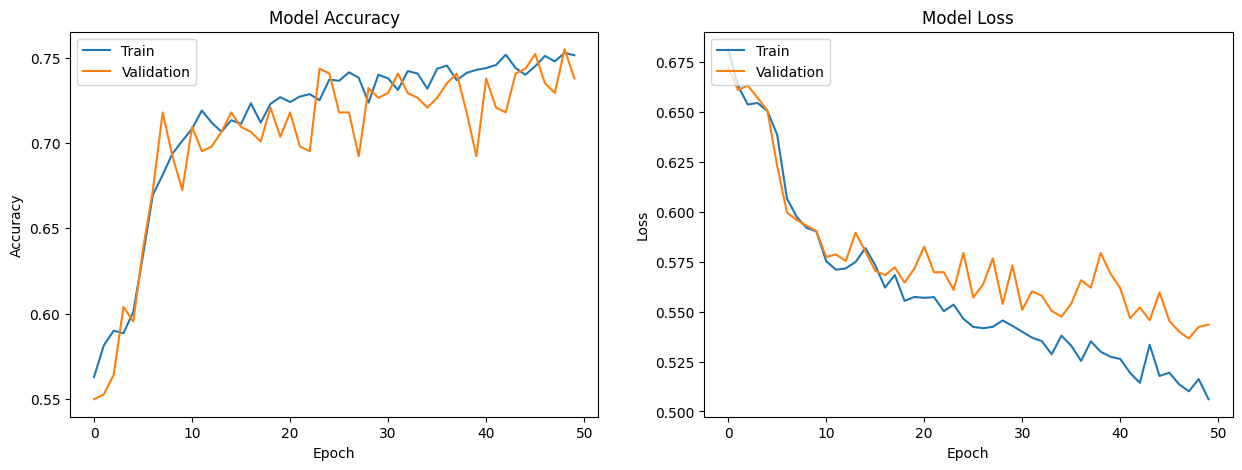

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax1.set_title('Model Accuracy')
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Epoch')
ax1.legend(['Train', 'Validation'], loc='upper left')

ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('Model Loss')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
ax2.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### LSTM Evaluation

In [ ]:
# Final evaluation of the model
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1] * 100))


Accuracy: 76.42%


In [ ]:
model.save('../../assets')

INFO:tensorflow:Assets written to: ../../assets\assets


INFO:tensorflow:Assets written to: ../../assets\assets
